# Actividad 2_9: 

Vamos a hacer un trabajo en grupos. Dividiros en grupos de 2 o 3 personas (organizaros el trabajo para que se pueda hacer en paralelo). Debéis responder a la siguiente pregunta. ¿Existe relación entre la emisión de CO2 que tienen los países y su esperanza de vida? Para ello os sugiero lo siguiente:


1. Podéis buscar los datasets necesarios en el portal Kaggle.
2. Una vez encontrados hay que importar los datos y tratarlos con el objetivo de solucionar la pregunta realizada.
3. Puedes normalizar, pintar gráficas, buscar índices calculados en base a los datos, etc.
4. También puedes utilizar la matriz de correlación. La veremos con detalle más adelante, pero aquí tienes como usarla en Pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [14]:
# Código
import pandas as pd
import matplotlib.pyplot as pt
df_co2 = pd.read_csv("CO2Emission_LifeExp.csv")
#Si el csv está separado por ;
#df_co2 = pd.read_csv("CO2Emission_LifeExp.csv",sep=';')
#Si al leer los datos da error o mete caracteres raros, puede que esté mal el encoding:
#df_co2 = pd.read_csv("CO2Emission_LifeExp.csv",encoding=...)
df_co2.head()

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
0,Afghanistan,AFG,9900004,7.13,0.28,35383032,63.763
1,Albania,ALB,5208319,4.45,1.80,2886438,78.194
2,Algeria,DZA,156220560,0.17,3.85,40551392,76.298
3,Angola,AGO,30566933,3.13,1.06,28842489,59.925
4,Anguilla,AIA,30262,1.52,2.10,14429,81.441


In [ ]:
#Si quisiera sustituir parte de los strings de los nombres de los paises.
paises = []
for i,row in df_co2.iterrows():
    paises.append(row['Country'].replace('Al',''))

df_co2['Country'] = paises


In [15]:
#Si quiero crear una columna nueva combinación de otras dos:
co2_emission_next_year = []
for i,row in df_co2.iterrows():
    co2_emission_next_year.append(row['CO2Emissions']*(1+row['YearlyChange']/100))

df_co2['CO2EmissionsNextYear'] = co2_emission_next_year

In [16]:
df_co2.head()

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy,CO2EmissionsNextYear
0,Afghanistan,AFG,9900004,7.13,0.28,35383032,63.763,1.060587e+07
1,Albania,ALB,5208319,4.45,1.80,2886438,78.194,5.440089e+06
2,Algeria,DZA,156220560,0.17,3.85,40551392,76.298,1.564861e+08
3,Angola,AGO,30566933,3.13,1.06,28842489,59.925,3.152368e+07
4,Anguilla,AIA,30262,1.52,2.10,14429,81.441,3.072198e+04


In [5]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         208 non-null    object 
 1   Code            208 non-null    object 
 2   CO2Emissions    208 non-null    int64  
 3   YearlyChange    208 non-null    float64
 4   Percapita       208 non-null    float64
 5   Population      208 non-null    int64  
 6   LifeExpectancy  208 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 11.5+ KB


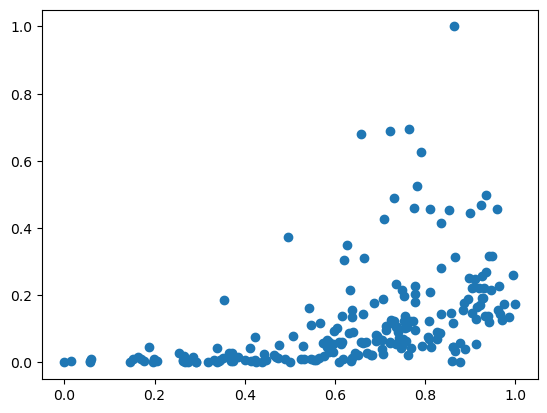

In [17]:

df_co2_norm = df_co2.drop(["Code","CO2Emissions","YearlyChange","Population"],axis=1)
column = "Percapita"
df_co2_norm[column] = (df_co2_norm[column] - df_co2_norm[column].min()) / (df_co2_norm[column].max() - df_co2_norm[column].min())
column = "LifeExpectancy"
df_co2_norm[column] = (df_co2_norm[column] - df_co2_norm[column].min()) / (df_co2_norm[column].max() - df_co2_norm[column].min())
co2_percapita = df_co2_norm["Percapita"].values
co2_LifeExp = df_co2_norm["LifeExpectancy"].values
pt.scatter(co2_LifeExp,co2_percapita)
pt.show()

In [49]:
df_co2['Country'].to_frame()

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Anguilla
...,...
203,Vietnam
204,Western Sahara
205,Yemen
206,Zambia


Se puede ver a simple vista que el dataframe de co2_percapita tiene Outliers. Los outliers son datos que se alejan por arriba o por abajo mucho de los valores habituales de los demás. En concreto se suelen considerar outliers los valores por encima de 1,5 veces la desviación estándar o 3 veces en cálculos más conservadores. 
Un paso habitual en el análisis de datos es eliminar estos outliers.

Para detectar los outliers se suele calcular el z score. Este dato estadístico mide cuantas veces la desviación estándar se desvía un dato concreto de la media.

203
       Country  Percapita  LifeExpectancy  CO2EmissionsNextYear  abs_z_scores
0  Afghanistan       0.28          63.763          1.060587e+07      0.772628
1      Albania       1.80          78.194          5.440089e+06      0.506963
2      Algeria       3.85          76.298          1.564861e+08      0.148664
3       Angola       1.06          59.925          3.152368e+07      0.636300
4     Anguilla       2.10          81.441          3.072198e+04      0.454529


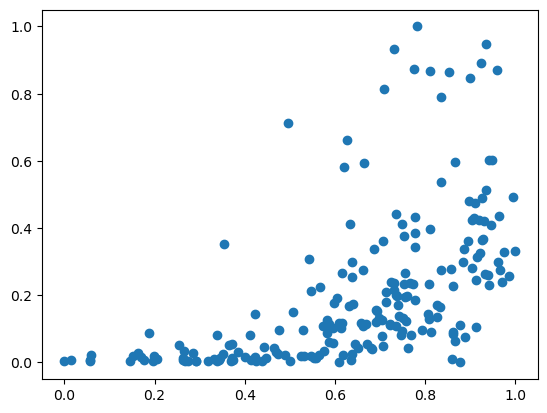

In [21]:
from scipy import stats
import numpy as np
df_co2_fil = df_co2.drop(["Code","CO2Emissions","YearlyChange","Population"],axis=1)
z_scores = stats.zscore(df_co2_fil[["Percapita"]])
#z_scores es un DataFrame con los datos z_score de la columna Percapita
df_co2_fil['abs_z_scores'] = np.abs(z_scores)
#print(df_co2_fil.head())
df_co2_fil = df_co2_fil.loc[df_co2_fil['abs_z_scores']<3]
print(len(df_co2_fil))
column = "Percapita"
print(df_co2_fil.head())
df_co2_fil[column] = (df_co2_fil[column] - df_co2_fil[column].min()) / (df_co2_fil[column].max() - df_co2_fil[column].min())
column = "LifeExpectancy"
df_co2_fil[column] = (df_co2_fil[column] - df_co2_fil[column].min()) / (df_co2_fil[column].max() - df_co2_fil[column].min())
co2_percapita = df_co2_fil["Percapita"].values
co2_LifeExp = df_co2_fil["LifeExpectancy"].values
pt.scatter(co2_LifeExp,co2_percapita)
pt.show()

In [22]:
df_co2_fil['abs_z_scores']<3

0      True
1      True
2      True
3      True
4      True
       ... 
203    True
204    True
205    True
206    True
207    True
Name: abs_z_scores, Length: 203, dtype: bool

Seguimos sin poder sacar ninguna conclusión. Probemos a ordenar el dataframe por uno de los datos.

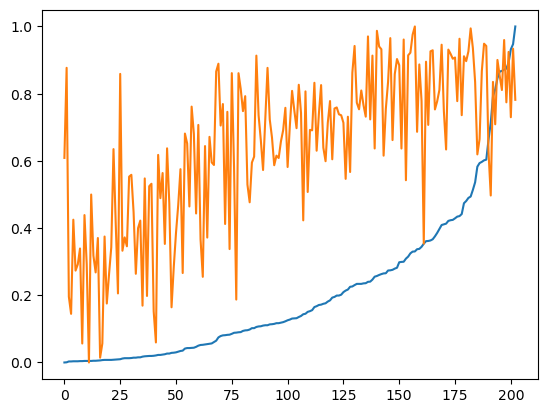

In [23]:
df_co2_fil = df_co2_fil.sort_values(by="Percapita")
co2_percapita = df_co2_fil["Percapita"].values
co2_LifeExp = df_co2_fil["LifeExpectancy"].values
pt.plot(co2_percapita)
pt.plot(co2_LifeExp)
pt.show()

Se puede intuir una cierta tendencia creciente en la esperanza de vida.
Veamos la matriz de correlación en teoría.

Ahora vamos a ver que resultado da con el dataframe original:

In [26]:
df_co2.corr(numeric_only=True)['LifeExpectancy'].sort_values()

YearlyChange           -0.175319
Population             -0.011464
CO2EmissionsNextYear    0.092211
CO2Emissions            0.092886
Percapita               0.477303
LifeExpectancy          1.000000
Name: LifeExpectancy, dtype: float64

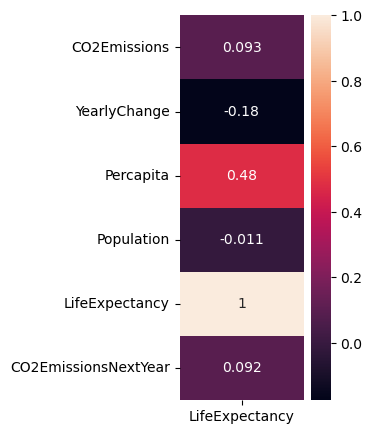

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(2,5))
sns.heatmap(df_co2.corr(numeric_only=True)['LifeExpectancy'].to_frame(), annot=True)
plt.show()

El dato de correlación entre la emsión de CO2 per capita y la esperanza de vida es de 0,48. Eso implica que hay correlación y que es moderada.

Hay que fijarse en un detalle. La correlación es positiva, es decir, a mayor emisión de CO2, mayor esperanza de vida. 
¿A que se debe esto? ¿El CO2 es bueno para la salud?
